In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
grape_variety = {
    'cab' : 1,
    'chardonnay' : 2,
    'pino noir' : 3,
    'pino grigio' : 4,
    'shiraz' : 5,
    'syrah' : 5,
    'malbec' : 6,
    'carmenere' : 7,
    'merlot' : 8,
    'tempranillo' : 9,
    'else' : 0
}

#데이터 불러오기
data = pd.read_csv('./sungsik_wine_data.csv')
data.head()

,grape variety,color,oak,vivino,red fruit,black fruit,earthy,spicy,citrus,tree fruit,tropical fruit,evaluation
0,tempranillo,0,1,3.5,1,1,0,0,0,0,0,3.0
1,chardonnay,1,0,2.9,0,0,1,0,1,0,1,3.0
2,else,1,0,3.3,0,0,0,0,1,0,0,2.5
3,cab,0,1,3.6,1,1,0,0,0,0,0,3.8
4,else,1,0,3.7,0,0,1,0,1,1,0,4.2


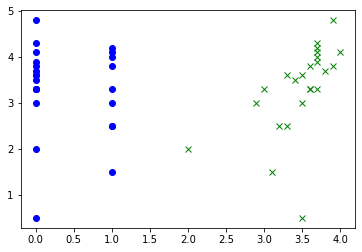

In [3]:
# 상관관계 분석
plot1 = plt.plot([float(i) for i in data.loc[:,'color']], [float(j) for j in data.loc[:,'evaluation']], 'bo')
plt.plot([float(i) for i in data.loc[:,'vivino']], [float(j) for j in data.loc[:,'evaluation']], 'gx')
plt.show()

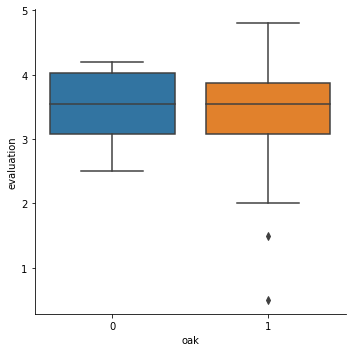

In [4]:
# oak 향과 취향의 중간값 검사
sns.catplot(data = data, x = 'oak', y='evaluation', kind = 'box')

In [5]:
#Feature Engineering

#1 grape variety를 수치화할 수 있는 숫자로 바꾸기
for variety in grape_variety.keys():
    data.loc[data.loc[:,'grape variety'] == variety, 'grape variety'] = grape_variety[variety]

#2 정답 부분 - evaluation을 제거하기 (추후에 진행할 것이므로 여기서는 생략하였음)
# try:
#     data.drop('evaluation', axis = 1, inplace = True)
# except:
#     pass
    
#3 비비노 점수 변화 스케일이 너무 작으므로 더 키운다.
VIVINO_PORTION = float(input())
data.loc[:, 'vivino'] = data.loc[:, 'vivino']*VIVINO_PORTION
data.head()

5


,grape variety,color,oak,vivino,red fruit,black fruit,earthy,spicy,citrus,tree fruit,tropical fruit,evaluation
0,9,0,1,17.5,1,1,0,0,0,0,0,3.0
1,2,1,0,14.5,0,0,1,0,1,0,1,3.0
2,0,1,0,16.5,0,0,0,0,1,0,0,2.5
3,1,0,1,18.0,1,1,0,0,0,0,0,3.8
4,0,1,0,18.5,0,0,1,0,1,1,0,4.2


In [6]:
#1 다중 다항 회귀 사용
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#2 정규화하는 Lasso모델 : 과적합될만큼 큰 데이터가 아니므로 하지 않는다.
from sklearn.linear_model import Lasso

In [7]:
#DataFrame일때의 방식 + 평가

X = data.drop(['evaluation'], axis =1)
polynomial_transformer = PolynomialFeatures(3)
polynomial_data = polynomial_transformer.fit_transform(X.values)
polynomial_feature_names = polynomial_transformer.get_feature_names(X.columns)

X = pd.DataFrame(polynomial_data, columns = polynomial_feature_names)
y = data['evaluation']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3) #random_state = 5?
test_model = LinearRegression()

test_model.fit(X_train, y_train)

y_train_predict = test_model.predict(X_train)
y_test_predict = test_model.predict(X_test)

mse1 = mean_squared_error(y_train, y_train_predict)
mse2 = mean_squared_error(y_test, y_test_predict)

mse1, mse2

(5.695698995212146e-27, 316.646392816304)

In [13]:
# 실제 모델 사용 코드
def variety_validation(variety):
    return variety in grape_variety

X_for_column_names = data.drop(['evaluation'], axis =1)
column_names = X_for_column_names.columns

model = LinearRegression()
model.fit(X,y)

Grape_Variety = input('포도 품종을 입력하세요 : ')
Color = int(input('색깔 정보를 입력하시오 [레드와인 : 0, 화이트와인 : 1] : '))
Oak = int(input('오크향이 있습니까? [예 : 1, 아니오: 0] : '))
Vivino = float(input('비비노 평점을 입력하세요 : '))
RedFruit = int(input('붉은 과일 향이 있습니까? [예 : 1, 아니오 : 0] : '))
BlackFruit = int(input('검은 과일 향이 있습니까? [예 : 1, 아니오 : 0] : '))
Earthy = int(input('흙, 버섯, 가죽 향이 있습니까? [예 : 1, 아니오 : 0] : '))
Spicy = int(input('스파이시한 특성이 있습니까? [예 : 1, 아니오 : 0] : '))
Citrus = int(input('시트러스 향이 있습니까? [예 : 1, 아니오 : 0] : '))
TreeFruit = int(input('나무열매 향이 있습니까? [예 : 1, 아니오 : 0] : '))
TropicalFruit = int(input('열대과일 향이 있습니까? [예 : 1, 아니오 : 0] : '))

df_t = pd.DataFrame([grape_variety[Grape_Variety], Color, Oak, Vivino, RedFruit,\
                                         BlackFruit, Earthy, Spicy, Citrus, TreeFruit, TropicalFruit], column_names)


df=df_t.transpose()
polynomial_transformer = PolynomialFeatures(3)
polynomial_data = polynomial_transformer.fit_transform(df.values)
polynomial_feature_names = polynomial_transformer.get_feature_names(df.columns)

true_df = pd.DataFrame(polynomial_data, columns = polynomial_feature_names)

prediction = model.predict(true_df)
if prediction >=4.0:
    print(f'당신이 정말 좋아하는 스타일의 와인입니다! 예상 평점 : {prediction}')
elif 4.0>prediction >= 3.7:
    print(f'당신의 취향에 맞는 와인입니다. 예상 평점 : {prediction}')
elif 3.7> prediction > 3.4:
    print(f'당신의 취향과는 맞지 않을 수도 있겠군요. 하지만 때때로 마실만 할겁니다. 예상 평점 : {prediction}')
elif 3.4>=prediction>3.0:
    print(f'당신이 별로 좋아하지 않을 와인 같습니다. 예상 평점 : {prediction}')
else:
    print(f'당신이 전혀 좋아하지 않는 스타일의 와인입니다. 예상 평점 : {prediction}')
    
wanna_record = int(input('방금 예측한 와인의 평점을 매기시겠습니까? : [예 : 1, 아니오 : 0] : '))
if wanna_record ==1:
    with open('C:/Users/공성식/Desktop/WORKSTATION/Workstation_data/sungsik_wine_data.csv','a') as f:
        your_score = float(input('당신의 평가를 적어주세요. 학습한 뒤 더 나은 기능을 제공합니다! : '))
        f.write(f'\n{Grape_Variety},{Color},{Oak},{Vivino},{RedFruit},{BlackFruit},{Earthy},{Spicy},{Citrus},{TreeFruit},{TropicalFruit},{your_score}\n')
else:
    print('감사합니다.')

포도 품종을 입력하세요 : cab
색깔 정보를 입력하시오 [레드와인 : 0, 화이트와인 : 1] : 0
오크향이 있습니까? [예 : 1, 아니오: 0] : 0
비비노 평점을 입력하세요 : 5
붉은 과일 향이 있습니까? [예 : 1, 아니오 : 0] : 1
검은 과일 향이 있습니까? [예 : 1, 아니오 : 0] : 1
흙, 버섯, 가죽 향이 있습니까? [예 : 1, 아니오 : 0] : 0
스파이시한 특성이 있습니까? [예 : 1, 아니오 : 0] : 0
시트러스 향이 있습니까? [예 : 1, 아니오 : 0] : 0
나무열매 향이 있습니까? [예 : 1, 아니오 : 0] : 0
열대과일 향이 있습니까? [예 : 1, 아니오 : 0] : 0
당신이 전혀 좋아하지 않는 스타일의 와인입니다. 예상 평점 : [-30.71569027]
방금 예측한 와인의 평점을 매기시겠습니까? : [예 : 1, 아니오 : 0] : 1
당신의 평가를 적어주세요. 학습한 뒤 더 나은 기능을 제공합니다! : 5.0


True